<a href="https://colab.research.google.com/github/d9249/DACON/blob/main/CVLC_05_No_Data_Argmentation(public_0_96078_private_0_90397).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Activation, Dense
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [3]:
train = pd.read_csv('/content/drive/MyDrive/DACON_CVLC/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/DACON_CVLC/data/test.csv')
sub = pd.read_csv('/content/drive/MyDrive/DACON_CVLC/data/submission.csv')

In [4]:
# drop columns
x_train = train.drop(['id','digit','letter'],1)
x_train = x_train.values

In [5]:
# reshape
x_train = x_train.reshape(-1,28,28,1)

In [6]:
# 정규화
x_train = x_train/255

In [7]:
# one hot encoder
def one_hot_encoder(x):
    y = np.zeros((len(x), len(np.unique(x))))  # 모든 값이 0인 백터
    for i, num in enumerate(x):
        y[i][num] = 1  # Label에 해당하는 인덱스에 1을 입력
    return y

In [8]:
y_train = one_hot_encoder(train['digit'])

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
idg = ImageDataGenerator(height_shift_range=(-1,1), width_shift_range=(-1,1))

In [10]:
def create_cnn_model(x_train):
    inputs = tf.keras.layers.Input(x_train.shape[1:])
    # add로 모델을 점진적으로 추가하기 위한 함수.
    model = Sequential()
    
    model.add(Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1),padding='same'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    
    model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(32,(5,5),activation='relu',padding='same')) 
    model.add(BatchNormalization())
    model.add(Conv2D(32,(5,5),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(32,(5,5),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((3,3)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64,(5,5),activation='relu',padding='same')) 
    model.add(BatchNormalization())
    model.add(MaxPooling2D((3,3)))
    model.add(Dropout(0.3))
    
    model.add(Flatten())

    model.add(Dense(128,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(10,activation='softmax'))

    return model

In [11]:
# 모델만들기
model = create_cnn_model(x_train)

In [22]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.002,epsilon=None), metrics=['accuracy'])

In [23]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
64/64 [==============================] - 17s 8ms/step - loss: 2.8055 - accuracy: 0.1260
Epoch 2/100
64/64 [==============================] - 0s 8ms/step - loss: 2.1609 - accuracy: 0.2378
Epoch 3/100
64/64 [==============================] - 0s 7ms/step - loss: 1.7915 - accuracy: 0.3701
Epoch 4/100
64/64 [==============================] - 0s 8ms/step - loss: 1.5081 - accuracy: 0.4746
Epoch 5/100
64/64 [==============================] - 1s 8ms/step - loss: 1.2312 - accuracy: 0.5796
Epoch 6/100
64/64 [==============================] - 0s 7ms/step - loss: 1.0163 - accuracy: 0.6567
Epoch 7/100
64/64 [==============================] - 0s 8ms/step - loss: 0.8851 - accuracy: 0.7075
Epoch 8/100
64/64 [==============================] - 0s 8ms/step - loss: 0.8005 - accuracy: 0.7300
Epoch 9/100
64/64 [==============================] - 0s 8ms/step - loss: 0.7063 - accuracy: 0.7607
Epoch 10/100
64/64 [==============================] - 0s 7ms/step - loss: 0.6357 - accuracy: 0.7866
Epoch 11

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (32, 28, 28, 16)          160       
_________________________________________________________________
batch_normalization (BatchNo (32, 28, 28, 16)          64        
_________________________________________________________________
module_wrapper_1 (ModuleWrap (32, 28, 28, 16)          0         
_________________________________________________________________
module_wrapper_2 (ModuleWrap (32, 28, 28, 32)          4640      
_________________________________________________________________
batch_normalization_1 (Batch (32, 28, 28, 32)          128       
_________________________________________________________________
module_wrapper_3 (ModuleWrap (32, 28, 28, 32)          25632     
_________________________________________________________________
batch_normalization_2 (Batch (32, 28, 28, 32)          1

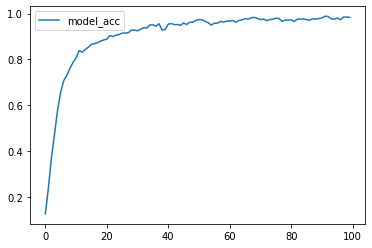

In [24]:
import matplotlib.pyplot as plt

plt.plot(model.history.history["accuracy"], label='model_acc')
plt.legend()
plt.show()

In [25]:
x_test = test.drop(['id', 'letter'], axis=1).values
x_test = x_test.reshape(-1, 28, 28, 1)
x_test = x_test/255

In [26]:
# 적용
sub['digit'] = np.argmax(model.predict(x_test), axis=1)
sub.head()

,id,digit
0,2049,6
1,2050,9
2,2051,8
3,2052,0
4,2053,3


In [27]:
# 파일저장
sub.to_csv('baseline.csv', index=False)